斷詞 計算行數

In [1]:
import jieba
import urllib
import math

url = "https://github.com/cjwu/cjwu.github.io/raw/master/courses/nlp/hw1-dataset.txt"
file = urllib.request.urlopen(url)
#txt = '電腦裡還是有著一堆開啟之後會亂碼內容完全看不懂的鬼畫符，是沒錯啦，一樣寫的是中文啦，但簡體與繁體兩種編碼方式就是無法共存，內容若是廣告直接刪了就好，但邊邊就是因為內容是想要的所以變成鬼畫符才更傷腦筋'
txt = ''

num_of_words_in_lines = [] #每一行的字詞數
num_of_lines = 0 #行數
freq_of_words_in_lines = [] #每一行出現的字詞與對應的出現次數

for line in file:
    items = []
    decoded_line = line.decode("utf-8")
    words  = jieba.lcut(decoded_line)
    counts = {}
    num_of_words = 0
    for word in words:
        counts[word] = counts.get(word,0) + 1
        num_of_words = num_of_words + 1
    items = list(counts.items())  
    items.sort(key=lambda x:x[1], reverse=True)
    freq_of_words_in_lines += (items, )
    num_of_words_in_lines += (num_of_words, )
    num_of_lines = num_of_lines+1
    
for i in range(10):
    print(freq_of_words_in_lines[i])

print(num_of_lines)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\UserTest\AppData\Local\Temp\jieba.cache
Loading model cost 1.111 seconds.
Prefix dict has been built successfully.


[(' ', 8), ('這群', 2), ('人', 2), ('為', 1), ('什麼', 1), ('聖結石', 1), ('會', 1), ('被', 1), ('酸', 1), ('而', 1), ('不會', 1), ('？', 1), ('\t', 1), ('質感', 1), ('劇本', 1), ('成員', 1), ('都', 1), ('差', 1), ('很多', 1), ('好', 1), ('嗎', 1), ('不要', 1), ('拿', 1), ('腎', 1), ('結石來', 1), ('污辱', 1), ('\n', 1)]
[('為', 1), ('什麼', 1), ('慶祝', 1), ('228', 1), ('會', 1), ('被', 1), ('罵', 1), ('可是', 1), ('慶', 1), ('端午', 1), ('不會', 1), ('？', 1), ('\t', 1), ('因為', 1), ('屈原', 1), ('不是', 1), ('台灣', 1), ('人', 1), ('，', 1), ('是', 1), ('楚國人', 1), ('。', 1), ('\n', 1)]
[('有', 2), ('阿瑞斯', 2), ('沒', 1), ('戰神', 1), ('的', 1), ('八卦', 1), ('?', 1), ('\t', 1), ('爵士', 1), ('就是', 1), (' ', 1), ('男主角', 1), ('最後死', 1), ('了', 1), ('\n', 1)]
[('脫節', 3), ('最', 2), ('的', 2), ('系', 2), ('不', 2), ('...', 2), ('理論', 1), ('與', 1), ('實務', 1), ('\t', 1), ('哪個', 1), ('你問', 1), ('簡單', 1), ('多', 1), ('了', 1), ('\n', 1)]
[('看', 2), ('棒球', 2), ('為', 1), ('什麼', 1), ('PTT', 1), ('這麼', 1), ('多', 1), ('人', 1), ('\t', 1), ('肥宅', 1), ('才', 1), ('\u3000', 1), (

In [2]:
for i in range(10):
    print(num_of_words_in_lines[i])

36
23
17
23
18
21
13
15
13
18


計算tf

In [3]:
tf = 0
for i in range(num_of_lines):
    for j in range(len(freq_of_words_in_lines[i])):
        tf = freq_of_words_in_lines[i][j][1] / num_of_words_in_lines[i]
        freq_of_words_in_lines[i][j] += (tf, )

for i in range(10):
    print(freq_of_words_in_lines[i])

[(' ', 8, 0.2222222222222222), ('這群', 2, 0.05555555555555555), ('人', 2, 0.05555555555555555), ('為', 1, 0.027777777777777776), ('什麼', 1, 0.027777777777777776), ('聖結石', 1, 0.027777777777777776), ('會', 1, 0.027777777777777776), ('被', 1, 0.027777777777777776), ('酸', 1, 0.027777777777777776), ('而', 1, 0.027777777777777776), ('不會', 1, 0.027777777777777776), ('？', 1, 0.027777777777777776), ('\t', 1, 0.027777777777777776), ('質感', 1, 0.027777777777777776), ('劇本', 1, 0.027777777777777776), ('成員', 1, 0.027777777777777776), ('都', 1, 0.027777777777777776), ('差', 1, 0.027777777777777776), ('很多', 1, 0.027777777777777776), ('好', 1, 0.027777777777777776), ('嗎', 1, 0.027777777777777776), ('不要', 1, 0.027777777777777776), ('拿', 1, 0.027777777777777776), ('腎', 1, 0.027777777777777776), ('結石來', 1, 0.027777777777777776), ('污辱', 1, 0.027777777777777776), ('\n', 1, 0.027777777777777776)]
[('為', 1, 0.043478260869565216), ('什麼', 1, 0.043478260869565216), ('慶祝', 1, 0.043478260869565216), ('228', 1, 0.043478260869

斷詞所有文件

In [4]:
url = "https://github.com/cjwu/cjwu.github.io/raw/master/courses/nlp/hw1-dataset.txt"
file = urllib.request.urlopen(url)
txt = ''

for line in file:
    decoded_line = line.decode("utf-8")
    txt = txt + decoded_line
    
words  = jieba.lcut(txt)

計算每個字詞出現在幾行

In [5]:
counts = {}  
num_of_words = 0
for word in words:  
    counts[word] = counts.get(word,0) + 1
    num_of_words = num_of_words + 1

print(counts[' '])

294598


In [6]:
freq_in_every_line = {}

for j in range(num_of_lines):
    for k in range(len(freq_of_words_in_lines[j])):
        freq_in_every_line[freq_of_words_in_lines[j][k][0]] = freq_in_every_line.get(freq_of_words_in_lines[j][k][0],0) + 1

print(freq_in_every_line[' '])

184430


In [7]:
counts_list = list(counts.items())

for i in range(30):
    print(counts_list[i])

freq_in_every_line_list = list(freq_in_every_line.items())

for i in range(30):
    print(freq_in_every_line_list[i])

('為', 30834)
('什麼', 57760)
(' ', 294598)
('聖結石', 118)
('會', 34672)
('被', 29440)
('酸', 754)
('而', 1442)
('這群', 139)
('人', 61440)
('不會', 10751)
('？', 160918)
('\t', 418202)
('質感', 59)
('劇本', 129)
('成員', 172)
('都', 64114)
('差', 2621)
('很多', 7488)
('好', 42804)
('嗎', 89875)
('不要', 8245)
('拿', 5413)
('腎', 142)
('結石來', 1)
('污辱', 41)
('\n', 418202)
('慶祝', 377)
('228', 379)
('罵', 2304)
(' ', 184430)
('這群', 135)
('人', 54093)
('為', 29829)
('什麼', 55639)
('聖結石', 116)
('會', 32737)
('被', 27549)
('酸', 715)
('而', 1419)
('不會', 10456)
('？', 146266)
('\t', 418202)
('質感', 58)
('劇本', 126)
('成員', 170)
('都', 59722)
('差', 2531)
('很多', 7321)
('好', 40096)
('嗎', 85376)
('不要', 7884)
('拿', 5176)
('腎', 135)
('結石來', 1)
('污辱', 40)
('\n', 418202)
('慶祝', 363)
('228', 362)
('罵', 2071)


計算idf

In [8]:
for j in range(num_of_lines):
    for k in range(len(freq_of_words_in_lines[j])):
        freq_of_words_in_lines[j][k] += (freq_in_every_line[freq_of_words_in_lines[j][k][0]], )

for i in range(10):
    print(freq_of_words_in_lines[i])

[(' ', 8, 0.2222222222222222, 184430), ('這群', 2, 0.05555555555555555, 135), ('人', 2, 0.05555555555555555, 54093), ('為', 1, 0.027777777777777776, 29829), ('什麼', 1, 0.027777777777777776, 55639), ('聖結石', 1, 0.027777777777777776, 116), ('會', 1, 0.027777777777777776, 32737), ('被', 1, 0.027777777777777776, 27549), ('酸', 1, 0.027777777777777776, 715), ('而', 1, 0.027777777777777776, 1419), ('不會', 1, 0.027777777777777776, 10456), ('？', 1, 0.027777777777777776, 146266), ('\t', 1, 0.027777777777777776, 418202), ('質感', 1, 0.027777777777777776, 58), ('劇本', 1, 0.027777777777777776, 126), ('成員', 1, 0.027777777777777776, 170), ('都', 1, 0.027777777777777776, 59722), ('差', 1, 0.027777777777777776, 2531), ('很多', 1, 0.027777777777777776, 7321), ('好', 1, 0.027777777777777776, 40096), ('嗎', 1, 0.027777777777777776, 85376), ('不要', 1, 0.027777777777777776, 7884), ('拿', 1, 0.027777777777777776, 5176), ('腎', 1, 0.027777777777777776, 135), ('結石來', 1, 0.027777777777777776, 1), ('污辱', 1, 0.027777777777777776, 40),

In [9]:
for i in range(num_of_lines):
    for j in range(len(freq_of_words_in_lines[i])):
        freq_of_words_in_lines[i][j] += (math.log(num_of_lines/freq_of_words_in_lines[i][j][3]), )
                   
for i in range(10):
    print(freq_of_words_in_lines[i])

[(' ', 8, 0.2222222222222222, 184430, 0.8186945816891481), ('這群', 2, 0.05555555555555555, 135, 8.03844506992757), ('人', 2, 0.05555555555555555, 54093, 2.045259781921522), ('為', 1, 0.027777777777777776, 29829, 2.6404834947178166), ('什麼', 1, 0.027777777777777776, 55639, 2.0170801751716554), ('聖結石', 1, 0.027777777777777776, 116, 8.190129657259636), ('會', 1, 0.027777777777777776, 32737, 2.54745863267163), ('被', 1, 0.027777777777777776, 27549, 2.719998332084368), ('酸', 1, 0.027777777777777776, 715, 6.371437305671992), ('而', 1, 0.027777777777777776, 1419, 5.686012171205957), ('不會', 1, 0.027777777777777776, 10456, 3.688788593061942), ('？', 1, 0.027777777777777776, 146266, 1.0505376875464256), ('\t', 1, 0.027777777777777776, 418202, 0.0), ('質感', 1, 0.027777777777777776, 58, 8.883276837819581), ('劇本', 1, 0.027777777777777776, 126, 8.107437941414522), ('成員', 1, 0.027777777777777776, 170, 7.807921411315738), ('都', 1, 0.027777777777777776, 59722, 1.9462641076554195), ('差', 1, 0.027777777777777776,

計算tf*idf

In [10]:
for i in range(num_of_lines):
    for j in range(len(freq_of_words_in_lines[i])):
        freq_of_words_in_lines[i][j] += (freq_of_words_in_lines[i][j][2]*freq_of_words_in_lines[i][j][4], )

for i in range(10):
    print(freq_of_words_in_lines[i])

[(' ', 8, 0.2222222222222222, 184430, 0.8186945816891481, 0.18193212926425512), ('這群', 2, 0.05555555555555555, 135, 8.03844506992757, 0.4465802816626428), ('人', 2, 0.05555555555555555, 54093, 2.045259781921522, 0.11362554344008455), ('為', 1, 0.027777777777777776, 29829, 2.6404834947178166, 0.07334676374216156), ('什麼', 1, 0.027777777777777776, 55639, 2.0170801751716554, 0.056030004865879314), ('聖結石', 1, 0.027777777777777776, 116, 8.190129657259636, 0.22750360159054542), ('會', 1, 0.027777777777777776, 32737, 2.54745863267163, 0.07076273979643416), ('被', 1, 0.027777777777777776, 27549, 2.719998332084368, 0.07555550922456578), ('酸', 1, 0.027777777777777776, 715, 6.371437305671992, 0.17698436960199976), ('而', 1, 0.027777777777777776, 1419, 5.686012171205957, 0.15794478253349878), ('不會', 1, 0.027777777777777776, 10456, 3.688788593061942, 0.10246634980727616), ('？', 1, 0.027777777777777776, 146266, 1.0505376875464256, 0.029181602431845154), ('\t', 1, 0.027777777777777776, 418202, 0.0, 0.0), (

整合

In [11]:
full_words = []

for i in range(num_of_lines):
    for j in range(len(freq_of_words_in_lines[i])):
        full_words.append((freq_of_words_in_lines[i][j]))

for i in range(10):
    print(full_words[i])

(' ', 8, 0.2222222222222222, 184430, 0.8186945816891481, 0.18193212926425512)
('這群', 2, 0.05555555555555555, 135, 8.03844506992757, 0.4465802816626428)
('人', 2, 0.05555555555555555, 54093, 2.045259781921522, 0.11362554344008455)
('為', 1, 0.027777777777777776, 29829, 2.6404834947178166, 0.07334676374216156)
('什麼', 1, 0.027777777777777776, 55639, 2.0170801751716554, 0.056030004865879314)
('聖結石', 1, 0.027777777777777776, 116, 8.190129657259636, 0.22750360159054542)
('會', 1, 0.027777777777777776, 32737, 2.54745863267163, 0.07076273979643416)
('被', 1, 0.027777777777777776, 27549, 2.719998332084368, 0.07555550922456578)
('酸', 1, 0.027777777777777776, 715, 6.371437305671992, 0.17698436960199976)
('而', 1, 0.027777777777777776, 1419, 5.686012171205957, 0.15794478253349878)


取tf*idf不重複前100名

In [12]:
full_words.sort(key=lambda x:x[5], reverse=True)
for i in range(100):
    print(full_words[i])

('▍', 16, 0.6956521739130435, 2, 12.250572667806054, 8.522137508038995)
('﹎', 14, 0.6363636363636364, 1, 12.943719848366, 8.236912630778363)
('簽拉', 11, 0.6470588235294118, 2, 12.250572667806054, 7.926841137992153)
('反田', 9, 0.6, 1, 12.943719848366, 7.7662319090195995)
('鞥', 12, 0.7058823529411765, 7, 10.997809699310686, 7.76315978774872)
('∷', 16, 0.5925925925925926, 1, 12.943719848366, 7.6703525027354065)
('簽拉', 11, 0.6111111111111112, 2, 12.250572667806054, 7.486461074770367)
('龘', 24, 0.6486486486486487, 6, 11.151960379137945, 7.2337040297111)
('國國國', 11, 0.6875, 19, 9.99928086919956, 6.8745055975746965)
('皮豆', 9, 0.5294117647058824, 1, 12.943719848366, 6.852557566782)
('嘿嘿', 12, 0.75, 48, 9.072518837458109, 6.8043891280935815)
('卍', 19, 0.7307692307692307, 44, 9.159530214447738, 6.6935028490195005)
('吖', 12, 0.5714285714285714, 4, 11.557425487246109, 6.604243135569204)
('嫑', 24, 0.7272727272727273, 59, 8.86618240446028, 6.448132657789295)
('噢', 19, 0.7307692307692307, 103, 8.308990

In [13]:
tf_idf_first_100 = []
num = 0
n = 0
while(num<=100):
    repeat = 0
    for j in range(num):
        if num!=0:
            if full_words[n][0] == tf_idf_first_100[j][0]:
                n = n+1
                repeat = 1
                break
    if repeat == 0:
        tf_idf_first_100.append(full_words[n])
        n = n+1
        num = num+1

for i in range(100):
    print(tf_idf_first_100[i])

('▍', 16, 0.6956521739130435, 2, 12.250572667806054, 8.522137508038995)
('﹎', 14, 0.6363636363636364, 1, 12.943719848366, 8.236912630778363)
('簽拉', 11, 0.6470588235294118, 2, 12.250572667806054, 7.926841137992153)
('反田', 9, 0.6, 1, 12.943719848366, 7.7662319090195995)
('鞥', 12, 0.7058823529411765, 7, 10.997809699310686, 7.76315978774872)
('∷', 16, 0.5925925925925926, 1, 12.943719848366, 7.6703525027354065)
('龘', 24, 0.6486486486486487, 6, 11.151960379137945, 7.2337040297111)
('國國國', 11, 0.6875, 19, 9.99928086919956, 6.8745055975746965)
('皮豆', 9, 0.5294117647058824, 1, 12.943719848366, 6.852557566782)
('嘿嘿', 12, 0.75, 48, 9.072518837458109, 6.8043891280935815)
('卍', 19, 0.7307692307692307, 44, 9.159530214447738, 6.6935028490195005)
('吖', 12, 0.5714285714285714, 4, 11.557425487246109, 6.604243135569204)
('嫑', 24, 0.7272727272727273, 59, 8.86618240446028, 6.448132657789295)
('噢', 19, 0.7307692307692307, 103, 8.308990860136364, 6.071954859330419)
('咩', 25, 0.8928571428571429, 540, 6.652150

取tf不重複前100名

In [14]:
full_words.sort(key=lambda x:x[2], reverse=True)
for i in range(100):
    print(full_words[i])

('咩', 25, 0.8928571428571429, 540, 6.65215070880768, 5.939420275721143)
('喵', 24, 0.8, 462, 6.808154957284261, 5.446523965827409)
('!', 31, 0.7948717948717948, 6220, 4.208194662632775, 3.344975244656821)
(' ', 44, 0.7857142857142857, 184430, 0.8186945816891481, 0.6432600284700449)
('!', 24, 0.7741935483870968, 6220, 4.208194662632775, 3.2579571581673097)
('啦', 27, 0.7714285714285715, 10412, 3.6930055822515437, 2.848890020594048)
('?', 34, 0.7555555555555555, 127440, 1.1883189037820696, 0.8978409495242303)
('嘿嘿', 12, 0.75, 48, 9.072518837458109, 6.8043891280935815)
('~', 36, 0.75, 5317, 4.365055334861661, 3.2737915011462455)
('!', 26, 0.7428571428571429, 6220, 4.208194662632775, 3.1260874636700615)
('!', 23, 0.7419354838709677, 6220, 4.208194662632775, 3.1222089432436717)
('錢', 23, 0.7419354838709677, 14387, 3.3696395483289665, 2.500055148760201)
('卍', 19, 0.7307692307692307, 44, 9.159530214447738, 6.6935028490195005)
('噢', 19, 0.7307692307692307, 103, 8.308990860136364, 6.0719548593304

In [15]:
tf_first_100 = []
num = 0
n = 0
while(num<=100):
    repeat = 0
    for j in range(num):
        if num!=0:
            if full_words[n][0] == tf_first_100[j][0]:
                n = n+1
                repeat = 1
                break
    if repeat == 0:
        tf_first_100.append(full_words[n])
        n = n+1
        num = num+1

for i in range(100):
    print(tf_first_100[i])

('咩', 25, 0.8928571428571429, 540, 6.65215070880768, 5.939420275721143)
('喵', 24, 0.8, 462, 6.808154957284261, 5.446523965827409)
('!', 31, 0.7948717948717948, 6220, 4.208194662632775, 3.344975244656821)
(' ', 44, 0.7857142857142857, 184430, 0.8186945816891481, 0.6432600284700449)
('啦', 27, 0.7714285714285715, 10412, 3.6930055822515437, 2.848890020594048)
('?', 34, 0.7555555555555555, 127440, 1.1883189037820696, 0.8978409495242303)
('嘿嘿', 12, 0.75, 48, 9.072518837458109, 6.8043891280935815)
('~', 36, 0.75, 5317, 4.365055334861661, 3.2737915011462455)
('錢', 23, 0.7419354838709677, 14387, 3.3696395483289665, 2.500055148760201)
('卍', 19, 0.7307692307692307, 44, 9.159530214447738, 6.6935028490195005)
('噢', 19, 0.7307692307692307, 103, 8.308990860136364, 6.071954859330419)
('欸', 19, 0.7307692307692307, 2605, 5.078531894178532, 3.71123484574585)
('嫑', 24, 0.7272727272727273, 59, 8.86618240446028, 6.448132657789295)
('嘻嘻', 5, 0.7142857142857143, 630, 6.498000028980422, 4.6414285921288725)
('鞥

畫tf*idf圖

In [20]:
import matplotlib.pyplot as plt

def draw1(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Weight')
    plt.title('tf-idf') # 設定圖表標題
    plt.show()

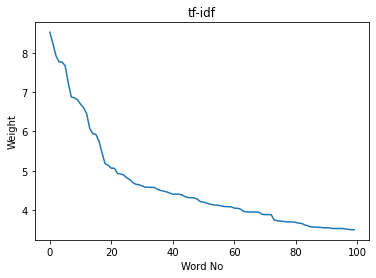

In [22]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(tf_idf_first_100[i][5])

draw1(x_label, y_label)

畫tf圖

In [23]:
def draw2(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Freq')
    plt.title('tf') # 設定圖表標題
    plt.show()

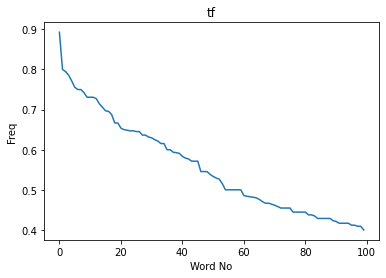

In [26]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(tf_first_100[i][2])

draw2(x_label, y_label)